# Double Pendulum Equations of Motion  
## Lagrangian Formulation

![](Resources/Double_Pendulum.png)

#### The above figure shows simple pendulum suspended from another simple pendulum by a frictionless hinge. 
- Both pendulums move in the same plane. 
- In this system, the rods $OP_1$ and $P_1P_2$ are rigid, massless and inextensible.
- The system has two degrees of freedom and is uniquely determined by the values of $\theta_1$ and $\theta_2$

In [1]:
# Import Modules
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Declare variables & constants

# time variable
t = sp.Symbol("t") 

# Gravitational constant
g = sp.Symbol("g", positive=True, real=True)

# Constants
l1, l2, m1, m2 = sp.symbols("l1, l2, m1, m2", positive=True, real=True)

# declare symbolic variables
theta1 = sp.Function('theta1')(t)
theta2 = sp.Function('theta2')(t)
theta1_dot = sp.Function('theta1_dot')(t)
theta2_dot = sp.Function('theta2_dot')(t)

In [3]:
# coordinates of P1
x1 = l1*sp.sin(theta1)
y1 = -l1*sp.cos(theta1)

# coordinates of P2
x2 = x1 + l2*sp.sin(theta2)
y2 = y1 - l2*sp.cos(theta2)

In [4]:
# derivatives w.r.t time
xdot1 = sp.diff(x1, t)
ydot1 = sp.diff(y1, t)

xdot2 = sp.diff(x2, t)
ydot2 = sp.diff(y2, t)

----
&nbsp;
#### Define Kinetic energy function, $T$ and potential energy function, $V$

In [5]:
def kinetic_energy(m, dx, dy, dz):
    T = sp.Rational(1,2)*m*(dx**2 + dy**2 + dz**2)
    return T

In [6]:
def potential_energy(m, g, h):
    V = m*g*h
    return V

For $P_1$

In [7]:
T1 = kinetic_energy(m1, xdot1, ydot1, 0)
V1 = potential_energy(m1, g, y1)

For $P_2$

In [8]:
T2 = kinetic_energy(m2, xdot2, ydot2, 0)
V2 = potential_energy(m2, g, y2)

----
&nbsp;
#### Form Lagrangian $L=T-V$

In [9]:
# Total kinetic energy of the system
T = T1 + T2
T_simplified = sp.trigsimp(T)
T = T_simplified

In [10]:
# Total potential energy of the system
V = V1 + V2
V_simplified = sp.simplify(V)
V = V_simplified

In [11]:
# Lagrangian
L = T - V
display(L)

g*(l1*m1*cos(theta1(t)) + l1*m2*cos(theta1(t)) + l2*m2*cos(theta2(t))) + l1**2*m1*Derivative(theta1(t), t)**2/2 + m2*(l1**2*Derivative(theta1(t), t)**2 + 2*l1*l2*cos(theta1(t) - theta2(t))*Derivative(theta1(t), t)*Derivative(theta2(t), t) + l2**2*Derivative(theta2(t), t)**2)/2

----
&nbsp;
## Euler-Lagrange Equations: 
For each generalised coordinate $\theta_i$

$$\frac{\text{d}}{\text{d}t}\left(\frac{\partial L}{\partial \dot{\theta}_i}\right)-\frac{\partial L}{\partial \theta_i}=0$$

In [12]:
def euler_lagrange_equation(L, q):
    """
    Computes the Euler-Lagrange equation for a given Lagrangian and variable.

    Parameters
    ----------
    L : sympy.Expr
        The Lagrangian of the system, a function that depends on generalized coordinates,
        their derivatives, and time.
    q : sympy.Function
        A function representing a generalized coordinate of the system.
        
    Returns
    -------
    sympy.Expr
        The Euler-Lagrange equation, a second order differential equation
        describing the dynamics of the system.

    """
    qdot = sp.diff(q, t)  # the derivative of the coordinate with respect to time
    partial_q = sp.trigsimp(sp.diff(L, q))  # partial derivative of L with respect to q
    partial_qdot = sp.trigsimp(sp.diff(L, qdot))  # partial derivative of L with respect to qdot
       
    eqn = sp.diff(partial_qdot, t) - partial_q # Euler-Lagrange equation
    simplified_eqn = sp.simplify(eqn)
    return simplified_eqn

In [13]:
theta1_eqn = euler_lagrange_equation(L, theta1)
display(theta1_eqn)

l1*(g*m1*sin(theta1(t)) + g*m2*sin(theta1(t)) + l1*m1*Derivative(theta1(t), (t, 2)) + l1*m2*Derivative(theta1(t), (t, 2)) + l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2 + l2*m2*cos(theta1(t) - theta2(t))*Derivative(theta2(t), (t, 2)))

In [14]:
theta2_eqn = euler_lagrange_equation(L, theta2)
display(theta2_eqn)

l2*m2*(g*sin(theta2(t)) - l1*sin(theta1(t) - theta2(t))*Derivative(theta1(t), t)**2 + l1*cos(theta1(t) - theta2(t))*Derivative(theta1(t), (t, 2)) + l2*Derivative(theta2(t), (t, 2)))

We can divide the $\theta_1$ eqn by $l_1$ and the $\theta_2$ eqn by $l_2m_2$

In [15]:
theta1_eq = theta1_eqn / l1
theta2_eq = theta2_eqn / (l2*m2)

Redeclare as equations using SymPy's `Eq` class

In [16]:
eq1 = sp.Eq(theta1_eq, 0)
eq2 = sp.Eq(theta2_eq, 0)

In [17]:
display(eq1)

Eq(g*m1*sin(theta1(t)) + g*m2*sin(theta1(t)) + l1*m1*Derivative(theta1(t), (t, 2)) + l1*m2*Derivative(theta1(t), (t, 2)) + l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2 + l2*m2*cos(theta1(t) - theta2(t))*Derivative(theta2(t), (t, 2)), 0)

In [18]:
display(eq2)

Eq(g*sin(theta2(t)) - l1*sin(theta1(t) - theta2(t))*Derivative(theta1(t), t)**2 + l1*cos(theta1(t) - theta2(t))*Derivative(theta1(t), (t, 2)) + l2*Derivative(theta2(t), (t, 2)), 0)

#### Which are our coupled 2nd-order equations of motion

----
&nbsp;
#### Rewrite E-L equations in form;

$$
\begin{aligned}
& \ddot{\theta}_1+\alpha_1\left(\theta_1, \theta_2\right) \ddot{\theta}_2=f_1\left(\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2\right) \\
& \ddot{\theta}_2+\alpha_2\left(\theta_1, \theta_2\right) \ddot{\theta}_1=f_2\left(\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2\right)
\end{aligned}
$$

  

#### Isolate the second derivative coefficients

In [19]:
def isolate_terms(equation):
    """
    Returns the second derivative terms isolated from the given equation.
    
    Parameters:
        equation (sympy.Eq): The equation from which to isolate the second derivative terms.
    
    Returns:
        list: A list containing the isolated second derivative terms.
    """
    # Define derivative terms
    theta1ddot = sp.diff(theta1, t, 2)
    theta2ddot = sp.diff(theta2, t, 2)
    
    terms = []

    try:
        th1 = sp.Eq(theta1ddot, sp.solve(equation, theta1ddot)[0])
        rhs_eq = th1.rhs
        alpha1 = sp.together(rhs_eq).as_numer_denom()[1]
        eq_new = sp.Eq(th1.lhs * alpha1, th1.rhs * alpha1)
        theta1_second = eq_new.lhs
        terms.append(theta1_second)
    except IndexError:
        pass

    try:
        th2 = sp.Eq(theta2ddot, sp.solve(equation, theta2ddot)[0])
        rhs_eq = th2.rhs
        alpha2 = sp.together(rhs_eq).as_numer_denom()[1]
        eq_new = sp.Eq(th2.lhs * alpha2, th2.rhs * alpha2)
        theta2_second = eq_new.lhs
        terms.append(theta2_second)
    except IndexError:
        pass

    return terms

#### Equation 1:

In [20]:
second_derivatives_1 = isolate_terms(eq1)

lhs_1 = second_derivatives_1[0] + second_derivatives_1[1]
rhs_1 = sp.simplify(eq1.lhs - lhs_1) 

eqn1 = sp.Eq(lhs_1, rhs_1)
display(eqn1)

Eq(l1*(m1 + m2)*Derivative(theta1(t), (t, 2)) + l2*m2*cos(theta1(t) - theta2(t))*Derivative(theta2(t), (t, 2)), g*m1*sin(theta1(t)) + g*m2*sin(theta1(t)) + l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2)

#### Equation 2:

In [21]:
second_derivatives_2 = isolate_terms(eq2)

lhs_2 = second_derivatives_2[0] + second_derivatives_2[1]
rhs_2 = sp.simplify(eq2.lhs - lhs_2)

eqn2 = sp.Eq(lhs_2, rhs_2)
display(eqn2)

Eq(l1*cos(theta1(t) - theta2(t))*Derivative(theta1(t), (t, 2)) + l2*Derivative(theta2(t), (t, 2)), g*sin(theta2(t)) - l1*sin(theta1(t) - theta2(t))*Derivative(theta1(t), t)**2)

----
&nbsp;
We can divide eqn1 by $l_1(m_1+m_2)$ and eqn2 by $l_2$

In [22]:
eqn1_lhs = sp.simplify(eqn1.lhs / (l1*(m1+m2)))
eqn1_lhs = sp.simplify(eqn1_lhs)

eqn1_rhs = sp.simplify(eqn1.rhs / (l1*(m1+m2)))
eqn1_rhs = sp.simplify(eqn1_rhs)

eqn1 = sp.Eq(eqn1_lhs, eqn1_rhs)
display(eqn1)

Eq((l1*(m1 + m2)*Derivative(theta1(t), (t, 2)) + l2*m2*cos(theta1(t) - theta2(t))*Derivative(theta2(t), (t, 2)))/(l1*(m1 + m2)), (g*m1*sin(theta1(t)) + g*m2*sin(theta1(t)) + l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2)/(l1*(m1 + m2)))

In [23]:
eqn2_lhs = sp.simplify(eqn2.lhs / l2)
eqn2_lhs = sp.simplify(eqn2_lhs)

eqn2_rhs = sp.simplify(eqn2.rhs / l2)
eqn2_rhs = sp.simplify(eqn2_rhs)

eqn2 = sp.Eq(eqn2_lhs, eqn2_rhs)
display(eqn2)

Eq(l1*cos(theta1(t) - theta2(t))*Derivative(theta1(t), (t, 2))/l2 + Derivative(theta2(t), (t, 2)), (g*sin(theta2(t)) - l1*sin(theta1(t) - theta2(t))*Derivative(theta1(t), t)**2)/l2)

----
&nbsp;
## Extract coefficients from above equations

In [24]:
def extract_coefficient(equation, derivative_term):
    """
    Extracts the coefficient, including the denominator, of the specified derivative term from the left-hand side of the equation.

    Parameters:
        equation (sympy.Expr): The equation to extract the coefficient from.
        derivative_term (sympy.Expr): The derivative term to extract the coefficient of.

    Returns:
        coeff (sympy.Expr): The coefficient, including the denominator, of the derivative term in the equation.
    """
    lhs_parts = sp.fraction(equation.lhs)
    lhs_coeff_term = lhs_parts[0]
    lhs_denominator_term = lhs_parts[1]
    coeff = lhs_coeff_term.coeff(derivative_term) / lhs_denominator_term

    return coeff

We can now rewrite in the desired form

$$
\begin{aligned}
& \ddot{\theta}_1+\alpha_1\left(\theta_1, \theta_2\right) \ddot{\theta}_2=f_1\left(\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2\right) \\
& \ddot{\theta}_2+\alpha_2\left(\theta_1, \theta_2\right) \ddot{\theta}_1=f_2\left(\theta_1, \theta_2, \dot{\theta}_1, \dot{\theta}_2\right)
\end{aligned}
$$

In [25]:
# Let alpha1 be 2nd derivative coefficient of theta2 from eqn1
alpha1 = extract_coefficient(eqn1, sp.diff(theta2, t, 2))
print(type(alpha1))
display(alpha1)

<class 'sympy.core.mul.Mul'>


l2*m2*cos(theta1(t) - theta2(t))/(l1*(m1 + m2))

In [26]:
# Let alpha2 be 2nd derivative coefficient of theta1 from eqn2
alpha2 = extract_coefficient(eqn2, sp.diff(theta1, t, 2))
print(type(alpha2))
display(alpha2)

<class 'sympy.core.mul.Mul'>


l1*cos(theta1(t) - theta2(t))/l2

Declare RHS as expressions

In [27]:
function_1 = eqn1.rhs
print(type(function_1))
display(function_1)

<class 'sympy.core.mul.Mul'>


(g*m1*sin(theta1(t)) + g*m2*sin(theta1(t)) + l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2)/(l1*(m1 + m2))

In [28]:
function_2 = eqn2.rhs
print(type(function_2))
display(function_2)

<class 'sympy.core.mul.Mul'>


(g*sin(theta2(t)) - l1*sin(theta1(t) - theta2(t))*Derivative(theta1(t), t)**2)/l2

----
&nbsp;
## Define symbolic matrix equations

Define dummy functions

In [29]:
alpha1_func = sp.Function('alpha1')(theta1, theta2)
alpha2_func = sp.Function('alpha2')(theta1, theta2)
function1 = sp.Function('f1')(theta1, theta2, sp.diff(theta1, t), sp.diff(theta2, t))
function2 = sp.Function('f2')(theta1, theta2, sp.diff(theta1, t), sp.diff(theta2, t))

Define matrices

In [30]:
# Differential operators
LHS = sp.Matrix([[sp.diff(theta1, t, 2)], [sp.diff(theta2, t, 2)]])
display(LHS)

Matrix([
[Derivative(theta1(t), (t, 2))],
[Derivative(theta2(t), (t, 2))]])

In [31]:
# Coefficients
A = sp.Matrix([[1, alpha1_func], [alpha2_func, 1]])
display(A)

Matrix([
[                           1, alpha1(theta1(t), theta2(t))],
[alpha2(theta1(t), theta2(t)),                            1]])

In [32]:
RHS = sp.Matrix([[function1], [function2]])
display(RHS)

Matrix([
[f1(theta1(t), theta2(t), Derivative(theta1(t), t), Derivative(theta2(t), t))],
[f2(theta1(t), theta2(t), Derivative(theta1(t), t), Derivative(theta2(t), t))]])

### Building matrix equations

In [33]:
sp.Eq(A*LHS, RHS)

Eq(Matrix([
[alpha1(theta1(t), theta2(t))*Derivative(theta2(t), (t, 2)) + Derivative(theta1(t), (t, 2))],
[alpha2(theta1(t), theta2(t))*Derivative(theta1(t), (t, 2)) + Derivative(theta2(t), (t, 2))]]), Matrix([
[f1(theta1(t), theta2(t), Derivative(theta1(t), t), Derivative(theta2(t), t))],
[f2(theta1(t), theta2(t), Derivative(theta1(t), t), Derivative(theta2(t), t))]]))

----
&nbsp;
Inverting the coefficient matrix $\textbf{A}$

In [34]:
inverse = A.inv()
display(inverse)

Matrix([
[                            1/(-alpha1(theta1(t), theta2(t))*alpha2(theta1(t), theta2(t)) + 1), -alpha1(theta1(t), theta2(t))/(-alpha1(theta1(t), theta2(t))*alpha2(theta1(t), theta2(t)) + 1)],
[-alpha2(theta1(t), theta2(t))/(-alpha1(theta1(t), theta2(t))*alpha2(theta1(t), theta2(t)) + 1),                             1/(-alpha1(theta1(t), theta2(t))*alpha2(theta1(t), theta2(t)) + 1)]])

Is the determinant defined?

In [35]:
determinant = A.det()
display(determinant)

-alpha1(theta1(t), theta2(t))*alpha2(theta1(t), theta2(t)) + 1

In [36]:
# Substituting values of alpha1 and alpha2
det_subst = determinant.subs({alpha1_func: alpha1, alpha2_func: alpha2})
display(det_subst)

-m2*cos(theta1(t) - theta2(t))**2/(m1 + m2) + 1

As $m_2/(m_1+m_2)<1$ and $\cos^2(x)\leq 1$ for all $x \in \mathbb{R}$, $\textbf{A}$ is always invertible

----
&nbsp;
#### Define NEW matrix equations

In [37]:
NewRHS = sp.simplify(inverse*RHS)

# Multiplied by minus 1!! worked, but why???
EQS = sp.Eq(LHS, (-1)*NewRHS)
display(EQS)

Eq(Matrix([
[Derivative(theta1(t), (t, 2))],
[Derivative(theta2(t), (t, 2))]]), Matrix([
[-(alpha1(theta1(t), theta2(t))*f2(theta1(t), theta2(t), Derivative(theta1(t), t), Derivative(theta2(t), t)) - f1(theta1(t), theta2(t), Derivative(theta1(t), t), Derivative(theta2(t), t)))/(alpha1(theta1(t), theta2(t))*alpha2(theta1(t), theta2(t)) - 1)],
[-(alpha2(theta1(t), theta2(t))*f1(theta1(t), theta2(t), Derivative(theta1(t), t), Derivative(theta2(t), t)) - f2(theta1(t), theta2(t), Derivative(theta1(t), t), Derivative(theta2(t), t)))/(alpha1(theta1(t), theta2(t))*alpha2(theta1(t), theta2(t)) - 1)]]))

Equations are of form, 
$$
\begin{aligned}
& \frac{d}{d t}\left(\begin{array}{c}
\theta_1 \\
\theta_2 \\
\omega_1 \\
\omega_2
\end{array}\right)=\left(\begin{array}{c}
\omega_1 \\
\omega_2 \\
g_1\left(\theta_1, \theta_2, \omega_1, \omega_2\right) \\
g_2\left(\theta_1, \theta_2, \omega_1, \omega_2\right)
\end{array}\right) \\
\end{aligned}
$$

$$
g_1:=\frac{f_1-\alpha_1 f_2}{1-\alpha_1 \alpha_2} \quad g_2:=\frac{-\alpha_2 f_1+f_2}{1-\alpha_1 \alpha_2}
$$

In [38]:
# Substitute values of the functions
EQS_subst = EQS.subs({alpha1_func: alpha1, alpha2_func: alpha2, function1: function_1, function2: function_2})
display(EQS_subst)

Eq(Matrix([
[Derivative(theta1(t), (t, 2))],
[Derivative(theta2(t), (t, 2))]]), Matrix([
[-(m2*(g*sin(theta2(t)) - l1*sin(theta1(t) - theta2(t))*Derivative(theta1(t), t)**2)*cos(theta1(t) - theta2(t))/(l1*(m1 + m2)) - (g*m1*sin(theta1(t)) + g*m2*sin(theta1(t)) + l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2)/(l1*(m1 + m2)))/(m2*cos(theta1(t) - theta2(t))**2/(m1 + m2) - 1)],
[              -(-(g*sin(theta2(t)) - l1*sin(theta1(t) - theta2(t))*Derivative(theta1(t), t)**2)/l2 + (g*m1*sin(theta1(t)) + g*m2*sin(theta1(t)) + l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2)*cos(theta1(t) - theta2(t))/(l2*(m1 + m2)))/(m2*cos(theta1(t) - theta2(t))**2/(m1 + m2) - 1)]]))

In [39]:
print(f"Type of System:\n{type(EQS_subst)}\n")

RHS_subst = EQS_subst.rhs 
print(f"Type of RHS:\n{type(RHS_subst)}")

Type of System:
<class 'sympy.core.relational.Equality'>

Type of RHS:
<class 'sympy.matrices.immutable.ImmutableDenseMatrix'>


The RHS of `EQS_subst` contains complex expressions. Simplify. We can unpack using index notation

In [40]:
# Value of second derivative of theta1 w.r.t time
print(f"Type of RHS[0]:\n{type(RHS_subst[0])}")
theta1ddot_eqn = RHS_subst[0]

# Simplify the complex expression
RHS_1 = sp.simplify(theta1ddot_eqn)
display(RHS_1)

Type of RHS[0]:
<class 'sympy.core.mul.Mul'>


(g*m1*sin(theta1(t)) + g*m2*sin(theta1(t) - 2*theta2(t))/2 + g*m2*sin(theta1(t))/2 + l1*m2*sin(2*theta1(t) - 2*theta2(t))*Derivative(theta1(t), t)**2/2 + l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2)/(l1*(-m1 + m2*cos(theta1(t) - theta2(t))**2 - m2))

In [41]:
# Value of second derivative of theta2 w.r.t time
print(f"Type of RHS[1]:\n{type(RHS_subst[1])}")
theta2ddot_eqn = RHS_subst[1]

# Simplify the complex expression
RHS_2 = sp.simplify(theta2ddot_eqn)
display(RHS_2)

Type of RHS[1]:
<class 'sympy.core.mul.Mul'>


((m1 + m2)*(g*sin(theta2(t)) - l1*sin(theta1(t) - theta2(t))*Derivative(theta1(t), t)**2) - (g*m1*sin(theta1(t)) + g*m2*sin(theta1(t)) + l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2)*cos(theta1(t) - theta2(t)))/(l2*(-m1 + m2*cos(theta1(t) - theta2(t))**2 - m2))

----
&nbsp;
## Rewrite as first order system

Declare new variables $\omega_1$ and $\omega_2$

In [42]:
omega1 = sp.Function('omega1')(t)
omega2 = sp.Function('omega2')(t)

In [43]:
# Cast as first order system
eq1 = sp.Eq(omega1, sp.diff(theta1, t))
eq2 = sp.Eq(omega2, sp.diff(theta2, t))
eq3 = sp.Eq(sp.diff(omega1, t), RHS_1)
eq4 = sp.Eq(sp.diff(omega2, t), RHS_2)

In [44]:
# Substitute omega for derivative of theta
derivative_subs = {sp.Derivative(theta1, t): omega1, sp.Derivative(theta2, t): omega2}

# Isolate rhs of equations
eqn1 = eq1.rhs.subs(derivative_subs)
eqn2 = eq2.rhs.subs(derivative_subs)
eqn3 = eq3.rhs.subs(derivative_subs)
eqn4 = eq4.rhs.subs(derivative_subs)

Define system as matrix equations

In [45]:
LHS_FIRST = sp.Matrix([[eq1.lhs], [eq2.lhs], [eq3.lhs], [eq4.lhs]])
RHS_FIRST = sp.Matrix([[eq1.rhs], [eq2.rhs], [eq3.rhs], [eq4.rhs]])

MAT_EQ = sp.Eq(LHS_FIRST, RHS_FIRST)
display(MAT_EQ)

Eq(Matrix([
[               omega1(t)],
[               omega2(t)],
[Derivative(omega1(t), t)],
[Derivative(omega2(t), t)]]), Matrix([
[                                                                                                                                                                                                                                                             Derivative(theta1(t), t)],
[                                                                                                                                                                                                                                                             Derivative(theta2(t), t)],
[           (g*m1*sin(theta1(t)) + g*m2*sin(theta1(t) - 2*theta2(t))/2 + g*m2*sin(theta1(t))/2 + l1*m2*sin(2*theta1(t) - 2*theta2(t))*Derivative(theta1(t), t)**2/2 + l2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2)/(l1*(-m1 + m2*cos(theta1(t) - theta2(t))**2 - m2))],
[((m1 + m2)*(g*sin(the

----
&nbsp;
# Numerical Integration

In [48]:
# Import numerical method
from scipy.integrate import odeint

Set unity parameters such that, 

$$m_1=m_2=1\text{kg}$$
$$l_1=l_2=1\text{m}$$

In [49]:
# Define parameters
params = {
    m1: 1,  # mass1
    m2: 1,  # mass2
    l1: 1,  # length1
    l2: 1,  # length2
    g : 9.81 # acceleration due to gravity
}

In [50]:
# Substitute parameters
eq1_subst = eqn1.subs(params)
eq2_subst = eqn2.subs(params)
eq3_subst = eqn3.subs(params)
eq4_subst = eqn4.subs(params)

In [51]:
# Convert sympy equations to pure Python - "lambdify"
eqn1 = sp.lambdify((theta1, theta2, omega1, omega2, t), eq1_subst, 'numpy')
eqn2 = sp.lambdify((theta1, theta2, omega1, omega2, t), eq2_subst, 'numpy')
eqn3 = sp.lambdify((theta1, theta2, omega1, omega2, t), eq3_subst, 'numpy')
eqn4 = sp.lambdify((theta1, theta2, omega1, omega2, t), eq4_subst, 'numpy')

In [52]:
def system(y, t):
    th1, th2, w1, w2 = y
    
    return [eqn1(th1, th2, w1, w2, t),
            eqn2(th1, th2, w1, w2, t),
            eqn3(th1, th2, w1, w2, t),
            eqn4(th1, th2, w1, w2, t)]

In [53]:
def degrees_to_radians(degrees):
    radians = np.deg2rad(degrees)
    return radians

print(degrees_to_radians(80))

1.3962634015954636


In [54]:
#Initial conditions
initial_conditions = [1.3962634015954636, 0, 0, 0] # [theta1, theta2, omega1, omega2]

In [55]:
# Time Vector
time = np.linspace(0, 20, 400)

In [56]:
# Solution
sol = odeint(system, initial_conditions, time)

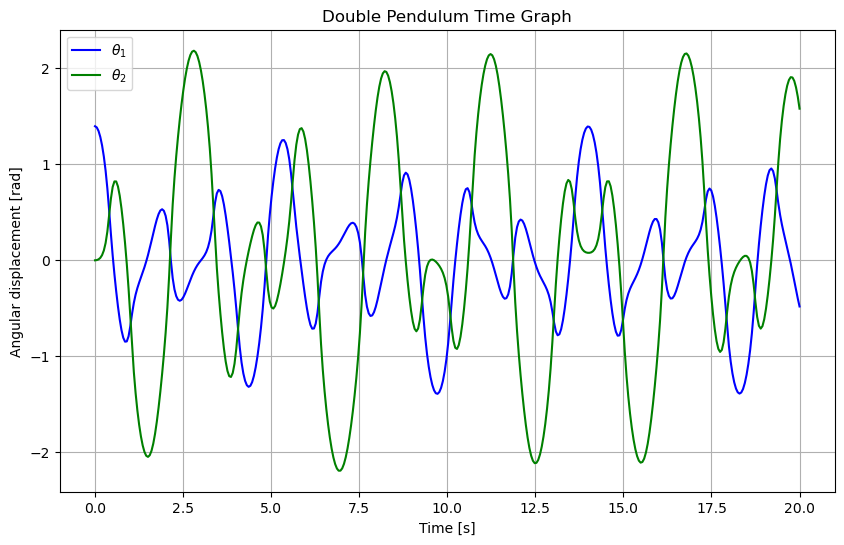

In [57]:
plt.figure(figsize=(10, 6))

# We limit y-values between -1 and 1
plt.plot(time, sol[:, 0], 'b', label="$θ_1$")
plt.plot(time, sol[:, 1], 'g', label="$θ_2$")

plt.xlabel('Time [s]')
plt.ylabel('Angular displacement [rad]')
plt.title('Double Pendulum Time Graph')

# Add a legend
plt.legend(loc='best')

# Show the plot
plt.grid(True)
plt.show()

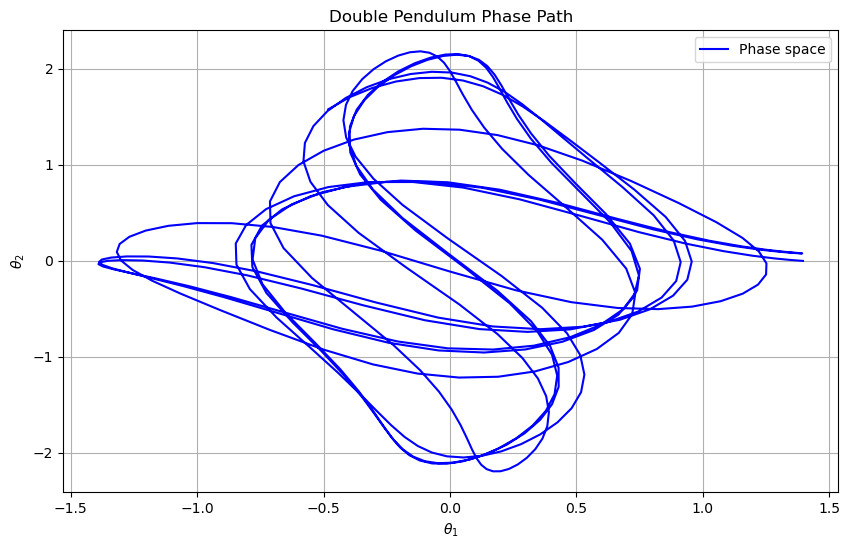

In [58]:
# Plot the phase space
plt.figure(figsize=(10, 6))
plt.plot(sol[:, 0], sol[:, 1], 'b', label="Phase space")

plt.xlabel('$θ_1$')
plt.ylabel('$θ_2$')
plt.title('Double Pendulum Phase Path')
plt.legend(loc='best')
plt.grid(True)
plt.show()

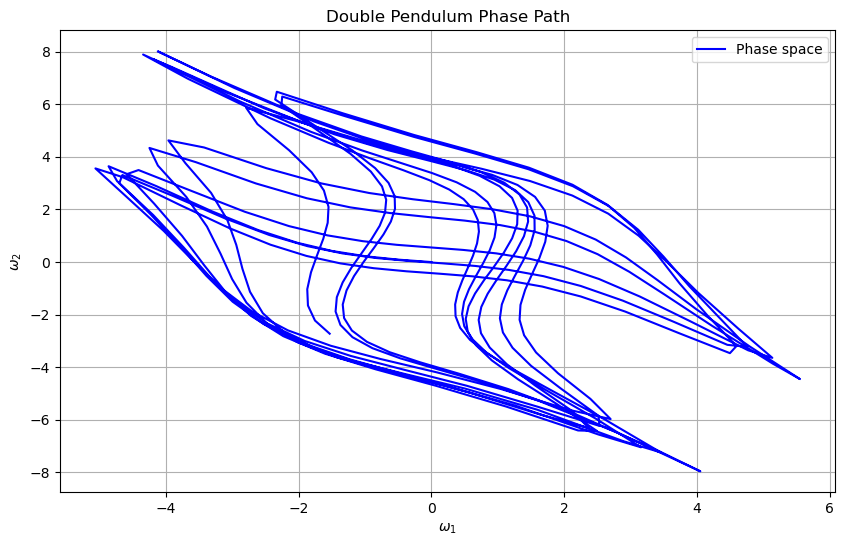

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(sol[:, 2], sol[:, 3], 'b', label="Phase space")

plt.xlabel('$\omega_1$')
plt.ylabel('$\omega_2$')
plt.title('Double Pendulum Phase Path')
plt.legend(loc='best')
plt.grid(True)
plt.show()